In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    # (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_new,average_queue_M,average_cost_M, save_file)

In [ ]:
file_name = '../lspu_25_batch_rand.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)
print("average cost new", average_new)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.02218152 0.04637605 0.07853824 0.05725438 0.00859358 0.0969608
 0.08726472 0.01996337 0.01617033 0.02464613 0.03042733 0.10773422
 0.02738459 0.03380814 0.06361598 0.01178817 0.0375646  0.04173844
 0.00954842 0.01309797 0.01060935 0.05152894 0.07068442 0.0145533
 0.01796703]
average cost B [3.03752684 2.72879692 2.58051637 2.51046048 2.45181012 2.42556773
 2.40963173 2.38704748 2.34439707 2.29357978 2.25944715 2.21793119
 2.19331901]
average cost new [3.03752684 2.72879692 2.58051637 2.51046048 2.45181012 2.42556773
 2.40963173 2.38704748 2.34439707 2.29357978 2.25944715 2.21793119
 2.19331901]


In [6]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

Expected cost for c = 0 case: 3.733
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

[-1.10463607  0.97346322] [0.07629355]


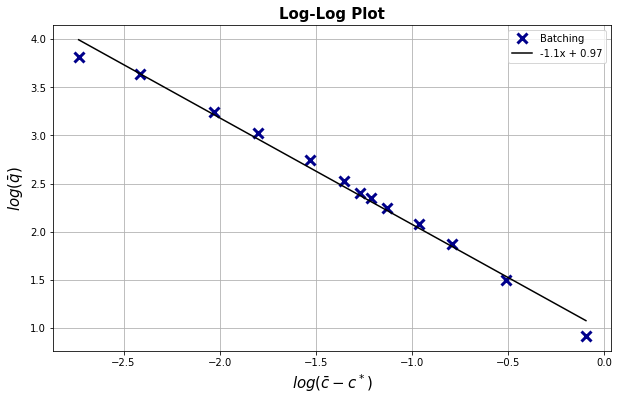

In [7]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B-Cstar_rand)
yB2 = np.log(average_queue_B)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [8]:
file_name = '../lspu_25_batch_26.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_26 = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_26 = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_26)
print("average cost new", average_new)

PMFs
[0.07692308 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154] [0.07692308 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154]
average cost B [3.05204813 2.65641465 2.45473066 2.35388722 2.27749204 2.24139398
 2.21050545 2.17028976 2.09385185 1.9962723  1.94011823 1.83920477
 1.80487626]
average cost new [3.05204813 2.65641465 2.45473066 2.35388722 2.27749204 2.24139398
 2.21050545 2.17028976 2.09385185 1.9962723  1.94011823 1.83920477
 1.80487626]


In [9]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_26 = fluid_sol['Cost']
print(Cstar_26)

Expected cost for c = 0 case: 3.899
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

[-2.00810038  1.94462408] [0.00419301]


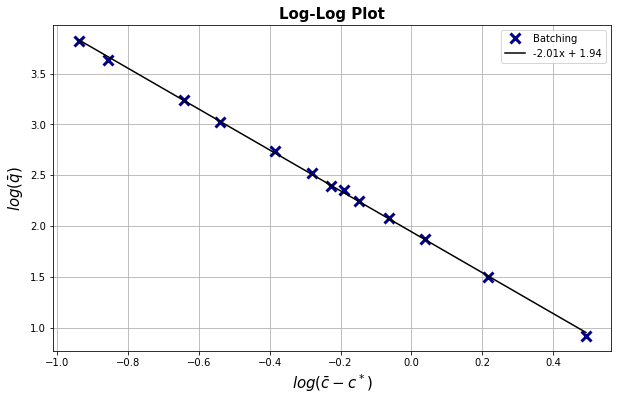

In [10]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_26-Cstar_26)
yB2 = np.log(average_queue_B_26)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [11]:
file_name = '../lspu_25_batch_26r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_26r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_26r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_26r)
print("average cost new", average_new)

PMFs
[0.07692308 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154] [0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
 0.07692308]
average cost B [3.06513432 2.67208834 2.47711134 2.36901824 2.29846954 2.26122681
 2.24287645 2.19582884 2.12422056 2.03769235 1.97793273 1.8864492
 1.85495667]
average cost new [3.06513432 2.67208834 2.47711134 2.36901824 2.29846954 2.26122681
 2.24287645 2.19582884 2.12422056 2.03769235 1.97793273 1.8864492
 1.85495667]


In [12]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_26r = fluid_sol['Cost']
print(Cstar_26r)

Expected cost for c = 0 case: 3.907
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

[-1.54064645  1.59445356] [0.04031215]


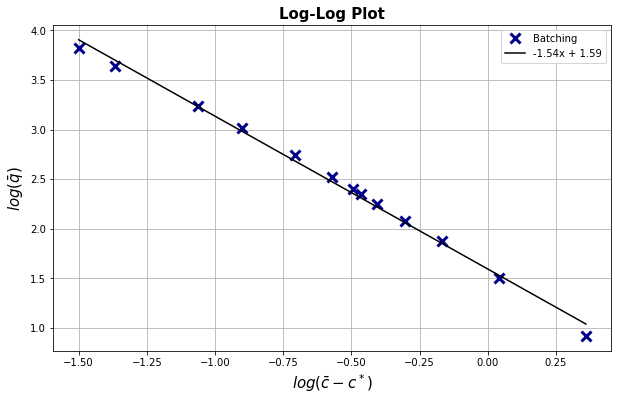

In [13]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_26r-Cstar_26r)
yB2 = np.log(average_queue_B_26r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [14]:
file_name = '../lspu_25_batch_49.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_49 = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_49 = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_49)
print("average cost new", average_new)

PMFs
[0.02040816 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633] [0.02040816 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633]
average cost B [3.01016619 2.63132338 2.43681322 2.33778264 2.26302233 2.22164006
 2.20395249 2.1548299  2.0788305  1.99466    1.92896477 1.84072983
 1.7954267 ]
average cost new [3.01016619 2.63132338 2.43681322 2.33778264 2.26302233 2.22164006
 2.20395249 2.1548299  2.0788305  1.99466    1.92896477 1.84072983
 1.7954267 ]


In [15]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_49 = fluid_sol['Cost']
print(Cstar_49)

Expected cost for c = 0 case: 3.83
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 5

[-2.02522651  1.90595609] [0.00490886]


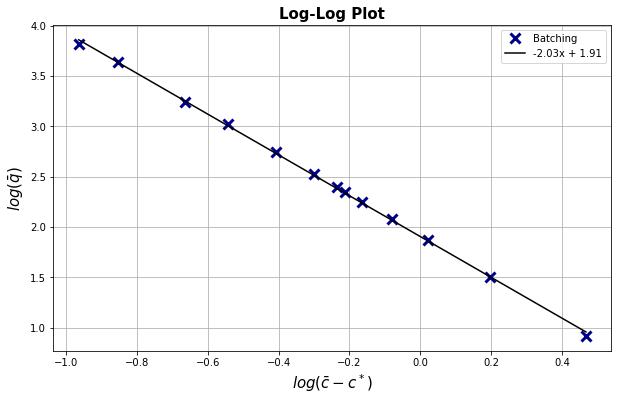

In [16]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_49-Cstar_49)
yB2 = np.log(average_queue_B_49)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [17]:
file_name = '../lspu_25_batch_49r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_49r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_49r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_49)
print("average cost new", average_new)

PMFs
[0.02040816 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633] [0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.02040816]
average cost B [3.01016619 2.63132338 2.43681322 2.33778264 2.26302233 2.22164006
 2.20395249 2.1548299  2.0788305  1.99466    1.92896477 1.84072983
 1.7954267 ]
average cost new [3.01887072 2.64102037 2.4419292  2.34472035 2.26901745 2.22399352
 2.20890605 2.16387934 2.09115903 2.00002108 1.93888239 1.85459014
 1.81531016]


In [18]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_49r = fluid_sol['Cost']
print(Cstar_49r)

Expected cost for c = 0 case: 3.832
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

[-1.7416329   1.69777598] [0.0176431]


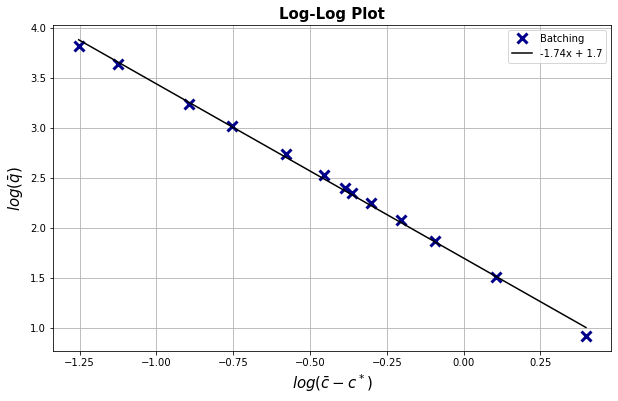

In [19]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_49r-Cstar_49r)
yB2 = np.log(average_queue_B_49r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [20]:
file_name = '../lspu_25_batch_point2.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2 = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2 = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2)
print("average cost new", average_new)

PMFs
[0.20075844 0.16060676 0.1284854  0.10278832 0.08223066 0.06578453
 0.05262762 0.0421021  0.03368168 0.02694534 0.02155627 0.01724502
 0.01379602 0.01103681 0.00882945 0.00706356 0.00565085 0.00452068
 0.00361654 0.00289323 0.00231459 0.00185167 0.00148134 0.00118507
 0.00094805] [0.20075844 0.16060676 0.1284854  0.10278832 0.08223066 0.06578453
 0.05262762 0.0421021  0.03368168 0.02694534 0.02155627 0.01724502
 0.01379602 0.01103681 0.00882945 0.00706356 0.00565085 0.00452068
 0.00361654 0.00289323 0.00231459 0.00185167 0.00148134 0.00118507
 0.00094805]
average cost B [2.56768381 2.28556393 2.15085726 2.0773251  2.03323218 2.00255621
 1.98774722 1.9507184  1.90215079 1.84264249 1.80267339 1.73630091
 1.70414787]
average cost new [2.56768381 2.28556393 2.15085726 2.0773251  2.03323218 2.00255621
 1.98774722 1.9507184  1.90215079 1.84264249 1.80267339 1.73630091
 1.70414787]


In [21]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2 = fluid_sol['Cost']
print(Cstar_point2)

Expected cost for c = 0 case: 3.186
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

[-2.11977691  1.21975458] [0.0018625]


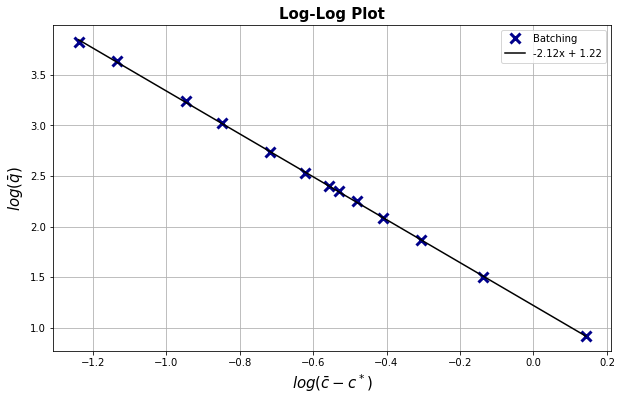

In [22]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2-Cstar_point2)
yB2 = np.log(average_queue_B_point2)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.20075844 0.16060676 0.1284854  0.10278832 0.08223066 0.06578453
 0.05262762 0.0421021  0.03368168 0.02694534 0.02155627 0.01724502
 0.01379602 0.01103681 0.00882945 0.00706356 0.00565085 0.00452068
 0.00361654 0.00289323 0.00231459 0.00185167 0.00148134 0.00118507
 0.00094805] [0.00094805 0.00118507 0.00148134 0.00185167 0.00231459 0.00289323
 0.00361654 0.00452068 0.00565085 0.00706356 0.00882945 0.01103681
 0.01379602 0.01724502 0.02155627 0.02694534 0.03368168 0.0421021
 0.05262762 0.06578453 0.08223066 0.10278832 0.1284854  0.16060676
 0.20075844]
average cost B [2.56768381 2.28556393 2.15085726 2.0773251  2.03323218 2.00255621
 1.98774722 1.9507184  1.90215079 1.84264249 1.80267339 1.73630091
 1.70414787]
average cost new [4.71886619 4.60852049 4.56123518 4.5481142  4.54026941 4.53063585
 4.54274587 4.52365641 4.52354387 4.51642933 4.51063777 4.50558891
 4.51344667]
Expected cost for c = 0 case: 5.059
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.

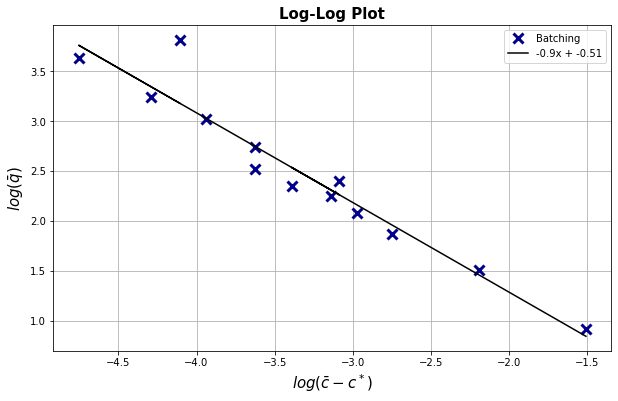

In [23]:
file_name = '../lspu_25_batch_point2r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [ ]:
plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)



xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)

deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)

PMFs
[3.00040237e-01 2.10028166e-01 1.47019716e-01 1.02913801e-01
 7.20396610e-02 5.04277627e-02 3.52994339e-02 2.47096037e-02
 1.72967226e-02 1.21077058e-02 8.47539408e-03 5.93277585e-03
 4.15294310e-03 2.90706017e-03 2.03494212e-03 1.42445948e-03
 9.97121638e-04 6.97985147e-04 4.88589603e-04 3.42012722e-04
 2.39408905e-04 1.67586234e-04 1.17310364e-04 8.21172545e-05
 5.74820782e-05] [5.74820782e-05 8.21172545e-05 1.17310364e-04 1.67586234e-04
 2.39408905e-04 3.42012722e-04 4.88589603e-04 6.97985147e-04
 9.97121638e-04 1.42445948e-03 2.03494212e-03 2.90706017e-03
 4.15294310e-03 5.93277585e-03 8.47539408e-03 1.21077058e-02
 1.72967226e-02 2.47096037e-02 3.52994339e-02 5.04277627e-02
 7.20396610e-02 1.02913801e-01 1.47019716e-01 2.10028166e-01
 3.00040237e-01]
average cost B [5.32077863 5.2618845  5.23847613 5.23603479 5.22168685 5.22081378
 5.22020159 5.21894204 5.214749   5.20728414 5.2085318  5.20771245
 5.20700669]
average cost new [5.32077863 5.2618845  5.23847613 5.23603479 5.221

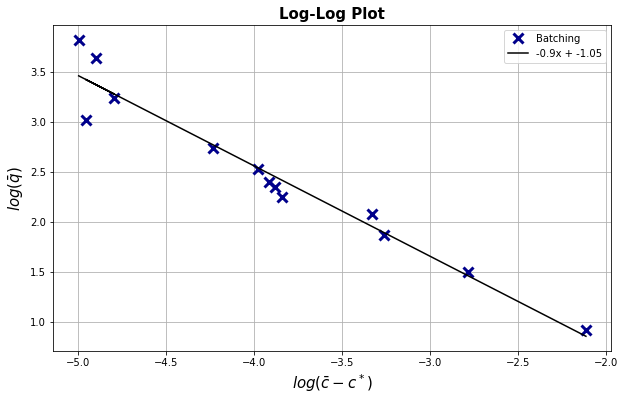

In [4]:
file_name = '../lspu_25_batch_point3r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[4.00001137e-01 2.40000682e-01 1.44000409e-01 8.64002456e-02
 5.18401474e-02 3.11040884e-02 1.86624531e-02 1.11974718e-02
 6.71848310e-03 4.03108986e-03 2.41865392e-03 1.45119235e-03
 8.70715410e-04 5.22429246e-04 3.13457548e-04 1.88074529e-04
 1.12844717e-04 6.77068303e-05 4.06240982e-05 2.43744589e-05
 1.46246753e-05 8.77480520e-06 5.26488312e-06 3.15892987e-06
 1.89535792e-06] [1.89535792e-06 3.15892987e-06 5.26488312e-06 8.77480520e-06
 1.46246753e-05 2.43744589e-05 4.06240982e-05 6.77068303e-05
 1.12844717e-04 1.88074529e-04 3.13457548e-04 5.22429246e-04
 8.70715410e-04 1.45119235e-03 2.41865392e-03 4.03108986e-03
 6.71848310e-03 1.11974718e-02 1.86624531e-02 3.11040884e-02
 5.18401474e-02 8.64002456e-02 1.44000409e-01 2.40000682e-01
 4.00001137e-01]
average cost B [5.72012734 5.68811814 5.68179718 5.6677742  5.67173021 5.66425574
 5.66687205 5.66721869 5.66303013 5.65841995 5.66069799 5.6596345
 5.66473986]
average cost new [5.72012734 5.68811814 5.68179718 5.6677742  5.6717

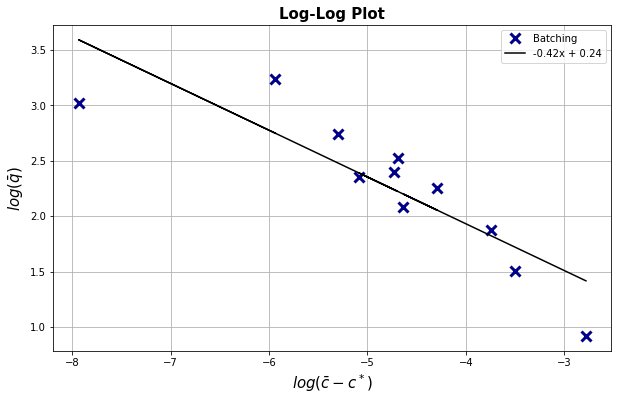

In [ ]:
file_name = '../lspu_25_batch_point4r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r[:-3]-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r[:-3])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[-0.73103221 -0.97745536] [1.6557237]


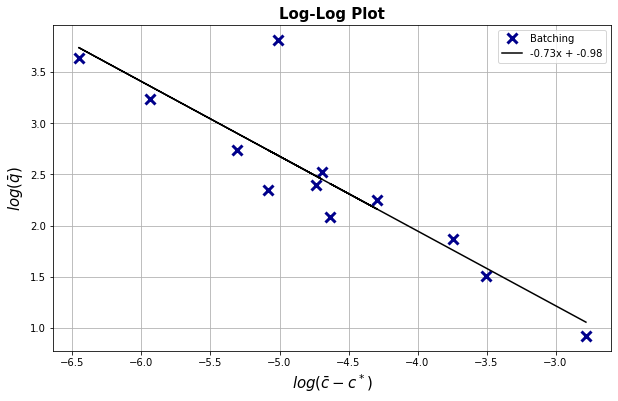

In [20]:
xB2 = np.log(average_cost_B_point2r[[0,1,2,3,4,5,6,7,8,10,11,12]]-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r[[0,1,2,3,4,5,6,7,8,10,11,12]])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[5.00000015e-01 2.50000007e-01 1.25000004e-01 6.25000019e-02
 3.12500009e-02 1.56250005e-02 7.81250023e-03 3.90625012e-03
 1.95312506e-03 9.76562529e-04 4.88281265e-04 2.44140632e-04
 1.22070316e-04 6.10351581e-05 3.05175790e-05 1.52587895e-05
 7.62939476e-06 3.81469738e-06 1.90734869e-06 9.53674345e-07
 4.76837172e-07 2.38418586e-07 1.19209293e-07 5.96046466e-08
 2.98023233e-08] [2.98023233e-08 5.96046466e-08 1.19209293e-07 2.38418586e-07
 4.76837172e-07 9.53674345e-07 1.90734869e-06 3.81469738e-06
 7.62939476e-06 1.52587895e-05 3.05175790e-05 6.10351581e-05
 1.22070316e-04 2.44140632e-04 4.88281265e-04 9.76562529e-04
 1.95312506e-03 3.90625012e-03 7.81250023e-03 1.56250005e-02
 3.12500009e-02 6.25000019e-02 1.25000004e-01 2.50000007e-01
 5.00000015e-01]
average cost B [6.03395263 6.01546646 6.01342214 6.01220939 6.01497987 6.01005626
 6.01052026 6.00680533 6.00848632 6.00839427 6.00909629 6.00495807
 6.00450781]
average cost new [6.03395263 6.01546646 6.01342214 6.01220939 6.014

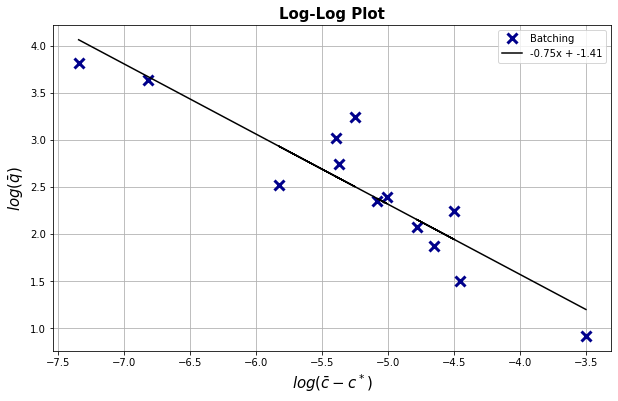

In [23]:
file_name = '../lspu_25_batch_point5r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [30]:
xB2

array([-3.50349869, -4.45625477, -4.65001825, -4.78565303, -4.49908566,
       -5.08392522, -5.01170381, -5.8277791 , -5.37614737, -5.39624986,
       -5.2522795 , -6.81485314, -7.34301843])

[-1.3130236  -4.10986261] [0.58741501]


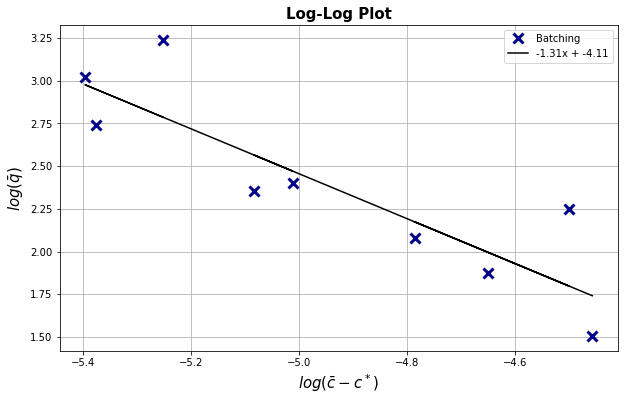

In [33]:
xB2 = np.log(average_cost_B_point2r[[1,2,3,4,5,6,8,9,10]]-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r[[1,2,3,4,5,6,8,9,10]])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[6.00000000e-01 2.40000000e-01 9.60000000e-02 3.84000000e-02
 1.53600000e-02 6.14400000e-03 2.45760000e-03 9.83040000e-04
 3.93216000e-04 1.57286400e-04 6.29145600e-05 2.51658240e-05
 1.00663296e-05 4.02653184e-06 1.61061274e-06 6.44245094e-07
 2.57698038e-07 1.03079215e-07 4.12316860e-08 1.64926744e-08
 6.59706977e-09 2.63882791e-09 1.05553116e-09 4.22212465e-10
 1.68884986e-10] [1.68884986e-10 4.22212465e-10 1.05553116e-09 2.63882791e-09
 6.59706977e-09 1.64926744e-08 4.12316860e-08 1.03079215e-07
 2.57698038e-07 6.44245094e-07 1.61061274e-06 4.02653184e-06
 1.00663296e-05 2.51658240e-05 6.29145600e-05 1.57286400e-04
 3.93216000e-04 9.83040000e-04 2.45760000e-03 6.14400000e-03
 1.53600000e-02 3.84000000e-02 9.60000000e-02 2.40000000e-01
 6.00000000e-01]
average cost B [6.30618833 6.30182992 6.30045894 6.30296692 6.29204954 6.29755904
 6.29579706 6.29466177 6.297404   6.29215267 6.29894125 6.2998723
 6.29743026]
average cost new [6.30618833 6.30182992 6.30045894 6.30296692 6.2920

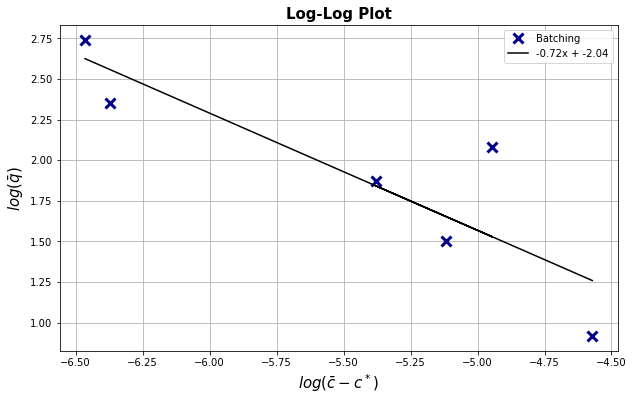

In [39]:
file_name = '../lspu_25_batch_point6r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r[[0,1,2,3,5,8]]-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r[[0,1,2,3,5,8]])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [37]:
xB2[[0,1,2,3,5,8]]

array([-4.57162578, -5.11887932, -5.37914965, -4.94488622, -6.37018566,
       -6.46511925])

PMFs
[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333] [0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667]
average cost B [3.17042044 2.78477991 2.6084134  2.52268204 2.45035782 2.41659605
 2.39116107 2.36278569 2.29989911 2.23923887 2.19267249 2.12453095
 2.10797696]
average cost new [3.17042044 2.78477991 2.6084134  2.52268204 2.45035782 2.41659605
 2.39116107 2.36278569 2.29989911 2.23923887 2.19267249 2.12453095
 2.10797696]
Expected cost for c = 0 case: 3.997
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2

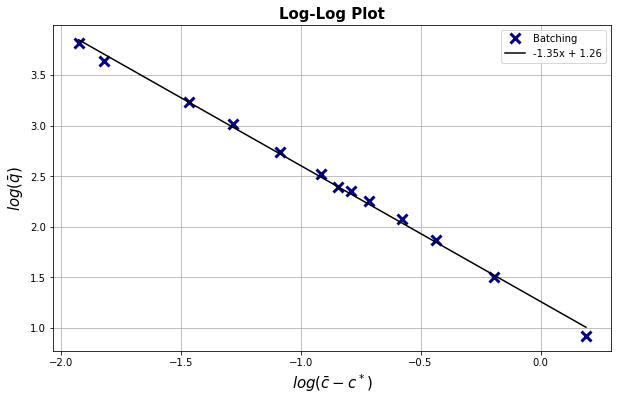

In [40]:
file_name = '../lspu_25_batch_k5r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.05714286 0.05714286 0.05714286 0.05714286 0.05714286 0.05714286
 0.05714286 0.05714286 0.05714286 0.05714286 0.02857143 0.02857143
 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
 0.02857143] [0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
 0.02857143 0.02857143 0.02857143 0.05714286 0.05714286 0.05714286
 0.05714286 0.05714286 0.05714286 0.05714286 0.05714286 0.05714286
 0.05714286]
average cost B [3.19711072 2.85724126 2.69140971 2.61605858 2.55003394 2.5179054
 2.51875256 2.48255998 2.4230367  2.36942543 2.3371739  2.28308287
 2.26483407]
average cost new [3.19711072 2.85724126 2.69140971 2.61605858 2.55003394 2.5179054
 2.51875256 2.48255998 2.4230367  2.36942543 2.3371739  2.28308287
 2.26483407]
Expected cost for c = 0 case: 3.973
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.8

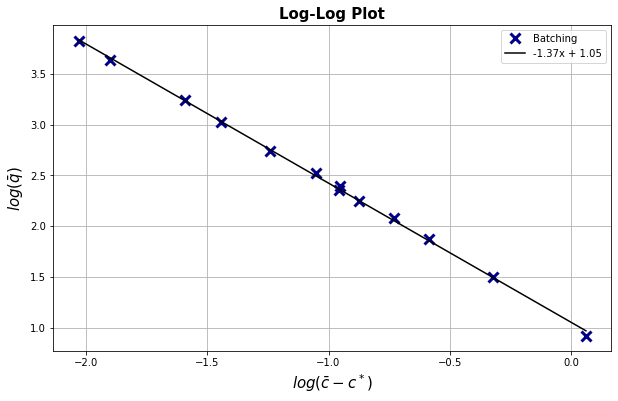

In [41]:
file_name = '../lspu_25_batch_k10r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
 0.05  0.05  0.05  0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025] [0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.05  0.05
 0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
 0.05 ]
average cost B [3.12186049 2.78441632 2.61081824 2.53752273 2.48268461 2.44998487
 2.43151011 2.40249141 2.35243594 2.27232861 2.24752937 2.19374858
 2.17607402]
average cost new [3.12186049 2.78441632 2.61081824 2.53752273 2.48268461 2.44998487
 2.43151011 2.40249141 2.35243594 2.27232861 2.24752937 2.19374858
 2.17607402]
Expected cost for c = 0 case: 3.872
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12

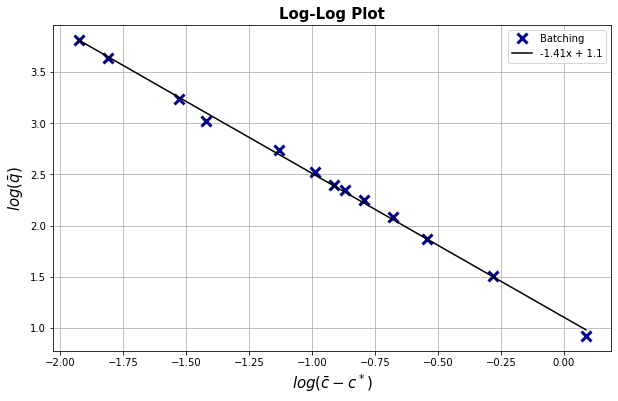

In [42]:
file_name = '../lspu_25_batch_k15r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444 0.04444444 0.02222222 0.02222222 0.02222222 0.02222222
 0.02222222] [0.02222222 0.02222222 0.02222222 0.02222222 0.02222222 0.04444444
 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
 0.04444444]
average cost B [3.02248307 2.66588835 2.48083846 2.38694754 2.32783986 2.29530676
 2.27395485 2.23352265 2.17144031 2.09932199 2.04923963 1.97716323
 1.95747485]
average cost new [3.02248307 2.66588835 2.48083846 2.38694754 2.32783986 2.29530676
 2.27395485 2.23352265 2.17144031 2.09932199 2.04923963 1.97716323
 1.95747485]
Expected cost for c = 0 case: 3.802
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2

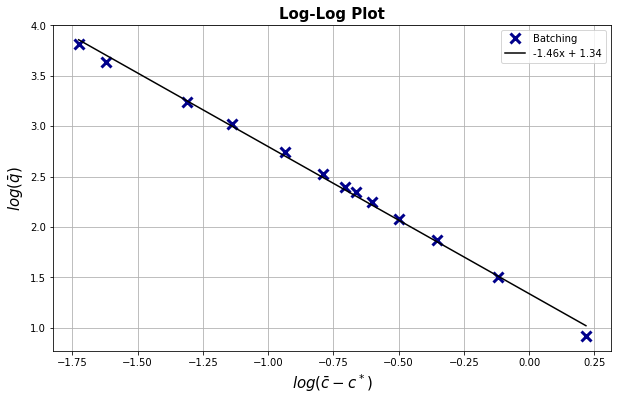

In [43]:
file_name = '../lspu_25_batch_k20r.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B_point2r)
print("average cost new", average_new)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_point2r = fluid_sol['Cost']
print(Cstar_point2r)
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
yB2 = np.log(average_queue_B_point2r)



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333] [0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667]
average cost B [3.17042044 2.78477991 2.6084134  2.52268204 2.45035782 2.41659605
 2.39116107 2.36278569 2.29989911 2.23923887 2.19267249 2.12453095
 2.10797696]
average cost new [3.17042044 2.78477991 2.6084134  2.52268204 2.45035782 2.41659605
 2.39116107 2.36278569 2.29989911 2.23923887 2.19267249 2.12453095
 2.10797696]
Expected cost for c = 0 case: 3.997
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2

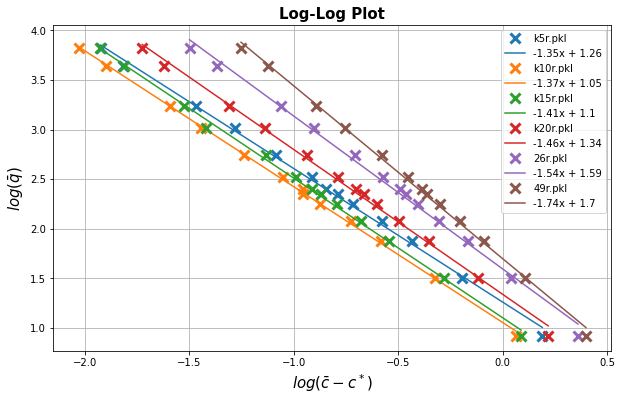

In [47]:
plt.figure( figsize=(10,6) )
ax = plt.gca()
legends = []
for fname in ['k5r.pkl','k10r.pkl','k15r.pkl','k20r.pkl', '26r.pkl', '49r.pkl']:
    file_name = '../lspu_25_batch_' + fname
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    print("PMFs")
    print(pmf_cust,pmf_serv)
    #Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
    #C_paths_B = np.transpose( np.asarray( C_paths_B ) )
    average_cost_B_point2r = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
    average_queue_B_point2r = np.average(Q_paths_B,axis = 0)
    print("average cost B", average_cost_B_point2r)
    print("average cost new", average_new)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    Cstar_point2r = fluid_sol['Cost']
    print(Cstar_point2r)
    # Polynomial fit
    deg = 1
    # xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
    # yM2 = np.log(average_queue_M_sc[1:10])
    xB2 = np.log(average_cost_B_point2r-Cstar_point2r)
    yB2 = np.log(average_queue_B_point2r)

    color = next(ax._get_lines.prop_cycler)['color']
    plt.ylabel("Average queue length", weight='bold',fontsize=12)
    plt.xlabel("Average cost", weight='bold',fontsize=12)
    plt.title("c vs q", weight='bold',fontsize=15)
    plt.grid(True)
    plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3,color=color)
    pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
    print(pB,resB)
    predict2_2 = np.poly1d(pB)
    x  = np.array(xB2)
    y = predict2_2(x)
    plt.plot(x, y, color=color)

    legends.append(fname)
    legends.append(str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2)))

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(legends)